# Classificador Naive Bayes - Parte 2/2

## Neste estudo:
- Utilizando a biblioteca naivebayes
- Avaliando o ROI (Return Over Investment) de um modelo
- Ajustando o ponto de corte do modelo para melhorar a performance
- Avaliando a área Sob a Curva - Area Under the Curve (AUC)
- KPI da matriz de confusão - Key Performance Indicator

Iniciaremos repetindo os procedimentos da parte 1 na mesma base, mas utilizaremos outra biblioteca com a função para o classificador Naive Bayes

In [1]:
library(tidyverse)
library(naivebayes)
library(caret)
library(ggplot2)

# Para a área sob a curva
library(ROCR)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v ggplot2 3.1.1       v purrr   0.3.2  
v tibble  2.1.1       v dplyr   0.8.0.1
v tidyr   0.8.3       v stringr 1.4.0  
v readr   1.3.1       v forcats 0.4.0  
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
Warning message:
"package 'naivebayes' was built under R version 3.6.3"naivebayes 0.9.7 loaded
Loading required package: lattice

Attaching package: 'caret'

The following object is masked from 'package:purrr':

    lift

Warning message:
"package 'ROCR' was built under R version 3.6.3"

### Carregando a base de dados e fazendo o oversamplig
Repete-se o procedimento executado na parte 1.

In [2]:
setwd("Dados")

In [3]:
#Importando arquivos tipo csv - função read.table

bank_data <- read.table("bank-full.csv", header = TRUE, sep = ";")

In [4]:
bank_oversample <- upSample(bank_data, bank_data$y)

str(bank_oversample)

'data.frame':	79844 obs. of  17 variables:
 $ age      : int  58 44 33 47 33 35 28 42 58 43 ...
 $ job      : Factor w/ 12 levels "admin.","blue-collar",..: 5 10 3 2 12 5 5 3 6 10 ...
 $ marital  : Factor w/ 3 levels "divorced","married",..: 2 3 2 2 3 2 3 1 2 3 ...
 $ education: Factor w/ 4 levels "primary","secondary",..: 3 2 2 4 4 3 3 3 1 2 ...
 $ default  : Factor w/ 2 levels "no","yes": 1 1 1 1 1 1 1 2 1 1 ...
 $ balance  : int  2143 29 2 1506 1 231 447 2 121 593 ...
 $ housing  : Factor w/ 2 levels "no","yes": 2 2 2 2 1 2 2 2 2 2 ...
 $ loan     : Factor w/ 2 levels "no","yes": 1 1 2 1 1 1 2 1 1 1 ...
 $ contact  : Factor w/ 3 levels "cellular","telephone",..: 3 3 3 3 3 3 3 3 3 3 ...
 $ day      : int  5 5 5 5 5 5 5 5 5 5 ...
 $ month    : Factor w/ 12 levels "apr","aug","dec",..: 9 9 9 9 9 9 9 9 9 9 ...
 $ duration : int  261 151 76 92 198 139 217 380 50 55 ...
 $ campaign : int  1 1 1 1 1 1 1 1 1 1 ...
 $ pdays    : int  -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 ...
 $ previous : int  0 0 0

In [5]:
bank_oversample %>% count(Class)

Class,n
no,39922
yes,39922


### Treinando o modelo
O modelo será treinado com 70% da nossa base de dados e os 30% restantes serão para validação do modelo com dados desconhecidos para avaliar a estabilidade de performance.

In [6]:
set.seed(42)

# Sem oversamplig

inTrain <- createDataPartition(bank_data$y, p = 0.7, list = FALSE)

train <- bank_data[inTrain, ]

test <- bank_data[-inTrain, ]

dim(train)
dim(test)

# Com oversampling

inTrain1 <- createDataPartition(bank_oversample$Class, p = 0.7, list = FALSE)

train1 <- bank_oversample[inTrain1, ]

test1 <- bank_oversample[-inTrain1, ]

dim(train1)
dim(test1)

[1] 31649    17

[1] 13562    17

[1] 55892    17

[1] 23952    17

In [7]:
# Treinando o modelo - nova função Naive Bayes

nb1 <- naive_bayes(Class ~ . , laplace = 1, usekernel = F, data = train1)

In [8]:
# Previsão na base de treinamento

nb_train_pred1 <- predict(nb1, train1, type = "class")

confusionMatrix(nb_train_pred1, train1$Class, positive = "yes")

Warning message:
"predict.naive_bayes(): more features in the newdata are provided as there are probability tables in the object. Calculation is performed based on features to be found in the tables."

Confusion Matrix and Statistics

          Reference
Prediction    no   yes
       no  21814  5606
       yes  6132 22340
                                          
               Accuracy : 0.79            
                 95% CI : (0.7866, 0.7934)
    No Information Rate : 0.5             
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.58            
                                          
 Mcnemar's Test P-Value : 1.261e-06       
                                          
            Sensitivity : 0.7994          
            Specificity : 0.7806          
         Pos Pred Value : 0.7846          
         Neg Pred Value : 0.7956          
             Prevalence : 0.5000          
         Detection Rate : 0.3997          
   Detection Prevalence : 0.5094          
      Balanced Accuracy : 0.7900          
                                          
       'Positive' Class : yes             
                  

In [9]:
# Previsão na base de teste sem oversampling

nb_test_pred1 <- predict(nb1, test, type = "class")

confusionMatrix(nb_test_pred1, test$y, positive = "yes")

Warning message:
"predict.naive_bayes(): more features in the newdata are provided as there are probability tables in the object. Calculation is performed based on features to be found in the tables."

Confusion Matrix and Statistics

          Reference
Prediction   no  yes
       no  9343  350
       yes 2633 1236
                                        
               Accuracy : 0.78          
                 95% CI : (0.773, 0.787)
    No Information Rate : 0.8831        
    P-Value [Acc > NIR] : 1             
                                        
                  Kappa : 0.3444        
                                        
 Mcnemar's Test P-Value : <2e-16        
                                        
            Sensitivity : 0.77932       
            Specificity : 0.78014       
         Pos Pred Value : 0.31946       
         Neg Pred Value : 0.96389       
             Prevalence : 0.11694       
         Detection Rate : 0.09114       
   Detection Prevalence : 0.28528       
      Balanced Accuracy : 0.77973       
                                        
       'Positive' Class : yes           
                                        

### Calculando o retorno esperado da campanha

Com os resultados do treinamento do modelo podemos estimar qual o custo e o retorno esperado da implementação da campanha. O retorno sobre o investimento é chamadado pela sigla ROI, do inglês Return Over Investment.

Para tal, iremos definir que o custo para a campanha é de 15 unidades monetárias por pessoa abordada e a adesão à campanha gera uma receita de 100 unidades monetárias.

In [10]:
# Os custos e lucros de realizar uma campanha como esta

custo <- 15
receita <- 100

In [11]:
# Analisando o retorno sobre o investimento - ROI - Return Over Investment

# Quando a prediction é yes, eu mandei a campanha
c <- ifelse(nb_test_pred1 == "yes", custo, 0)

# Quando a prediction é yes e y é yes, eu tenho lucro
r <- ifelse((test$y == "yes" & nb_test_pred1 == "yes"), receita, 0)

# Quando a prediction é no e y é yes, eu deixei de ganhar
custo_oportunidade <- sum(ifelse((test$y == "yes" & nb_test_pred1 == "no"), receita, 0))

In [12]:
# O calculo do ROI em percentual

lucro_liquido <- round(sum(r)-sum(c), 2)

custo_total <- round(sum(c), 2)

ROI <- round((sum(r)/sum(c)-1)*100, 2)

print(paste("O lucro líquido é: R$", lucro_liquido))

print(paste("O custo total é: R$", custo_total))

print(paste("O ROI é: ", ROI, "%"))

print(paste("Custo de oportunidade: R$", custo_oportunidade))

[1] "O lucro líquido é: R$ 65565"
[1] "O custo total é: R$ 58035"
[1] "O ROI é:  112.97 %"
[1] "Custo de oportunidade: R$ 35000"


### Otimizando o retorno da campanha
A fim de melhorar o desempenho da campanha iremos alterar o ponto de corte do modelo. Atualmente o modelo faz a previssão por classe e o ponto de corte padrão é 0.5. Se alterarmos a função predict para "prob" ela nos retornará a probabilidade de cada resultado, desta maneira podemos definir um novo valor para separar os resultados. Alteraremos o ponto de corte para 0.62, que apresentou uma melhora no resultado.

In [13]:
# Também é possível mudar a saída de type para prob - e mudar o ponde de corte para trabalhar melhor a acuracia

probabilidades <- predict(nb1, type = "prob", test)

probabilidades[1:5, ]

Warning message:
"predict.naive_bayes(): more features in the newdata are provided as there are probability tables in the object. Calculation is performed based on features to be found in the tables."

no,yes
0.9933387,0.006661286
0.9576358,0.042364165
0.9619266,0.038073409
0.9835241,0.016475906
0.9925284,0.007471635


In [14]:
# Previsão com mudança no ponto de corte - base de teste sem oversamplig

nb_cutoff <- as.factor(ifelse(probabilidades[,2] > 0.62, "yes", "no"))

confusionMatrix(nb_cutoff, test$y, positive = "yes")

Confusion Matrix and Statistics

          Reference
Prediction   no  yes
       no  9892  454
       yes 2084 1132
                                          
               Accuracy : 0.8129          
                 95% CI : (0.8062, 0.8194)
    No Information Rate : 0.8831          
    P-Value [Acc > NIR] : 1               
                                          
                  Kappa : 0.3733          
                                          
 Mcnemar's Test P-Value : <2e-16          
                                          
            Sensitivity : 0.71375         
            Specificity : 0.82599         
         Pos Pred Value : 0.35199         
         Neg Pred Value : 0.95612         
             Prevalence : 0.11694         
         Detection Rate : 0.08347         
   Detection Prevalence : 0.23713         
      Balanced Accuracy : 0.76987         
                                          
       'Positive' Class : yes             
                        

In [18]:
# Analisando o retorno sobre o investimento - ROI - Return Over Investment com o cut-off modificado

# Quando a prediction é yes, eu mandei a campanha
c_new <- ifelse(nb_cutoff == "yes", custo, 0)

# Quando a prediction é yes e y é yes, eu tenho lucro
r_new <- ifelse((test$y == "yes" & nb_cutoff == "yes"), receita, 0)

# Quando a prediction é no e y é yes, eu deixei de ganhar
custo_oportunidade_new <- sum(ifelse((test$y == "yes" & nb_cutoff == "no"), receita, 0))

### Como ficou o ROI?
Com o novo ponto de corte não tivemos um aumento significativo no lucro líquido, mas alcançamos uma redução nos gastos da campanha, ou seja, acertamos mais. Dessa forma nosso ROI aumentou em troca de um maior custo de oportunidade, ou seja, um número maior de clientes em potencial deixou de ser abordado. A alteração nas receitas previstas foi de -7.86%, mas a alteração nos custos previstos foi de -16.85%, como o custo diminuiu mais que a receita obtivemos um aumento do ROI.

In [19]:
# O calculo do ROI em percentual

lucro_liquido_new <- round(sum(r_new)-sum(c_new), 2)

custo_total_new <- round(sum(c_new), 2)

ROI_new <- round((sum(r_new)/sum(c_new)-1)*100, 2)

print(paste("O lucro líquido é: R$", lucro_liquido_new))

print(paste("O custo total é: R$", custo_total_new))

print(paste("O ROI é: ", ROI_new, "%"))

print(paste("Custo de oportunidade: R$", custo_oportunidade_new))

[1] "O lucro líquido é: R$ 64960"
[1] "O custo total é: R$ 48240"
[1] "O ROI é:  134.66 %"
[1] "Custo de oportunidade: R$ 45400"


In [20]:
# Lembrando o anterior

print(paste("O lucro líquido é: R$", lucro_liquido))

print(paste("O custo total é: R$", custo_total))

print(paste("O ROI é: ", ROI, "%"))

print(paste("Alteração nas receitas previstas: ", round((sum(r_new)/sum(r)-1)*100,2), "%"))

print(paste("Alteração nos custos previstos: ", round((sum(c_new)/sum(c)-1)*100,2), "%"))

print(paste("Custo de oportunidade: R$", custo_oportunidade))

[1] "O lucro líquido é: R$ 65565"
[1] "O custo total é: R$ 58035"
[1] "O ROI é:  112.97 %"
[1] "Alteração nas receitas previstas:  -8.41 %"
[1] "Alteração nos custos previstos:  -16.88 %"
[1] "Custo de oportunidade: R$ 35000"


### Entendendo a área sob a curva
A área sobre a curva indica a taxa de acertos frente os falsos positivos. Idealmente seu valor é 1 e indica que teremos 1 acerto para 0 falso positivo. Nosso valor ficou em 85,86% que é um valor interessante para este modelo e indica que termos 1,414 falso positivo a cada 10 acertos.

Warning message:
"predict.naive_bayes(): more features in the newdata are provided as there are probability tables in the object. Calculation is performed based on features to be found in the tables."

[1] "Auc"


[1] 0.8561557

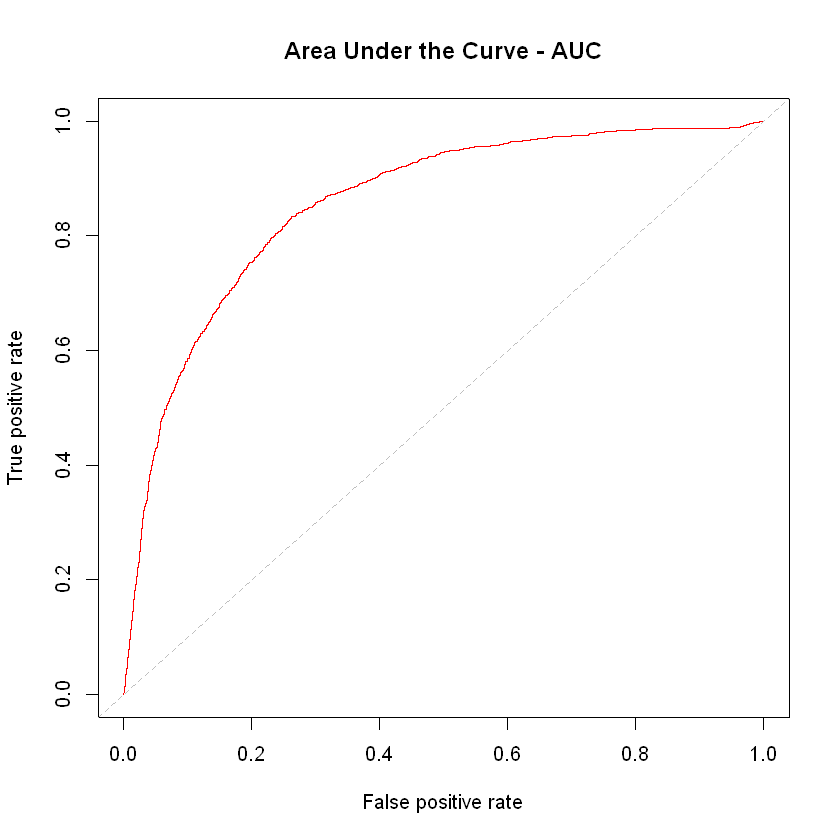

In [21]:
# Avaliando o modelo pelo AUC

# Plota a AUC
probabilidades <- predict(nb1, type = "prob", test)

nb1_probs <- prediction(probabilidades[,2], test$y)
plot(performance(nb1_probs, "tpr", "fpr"), col = "red", main = "Area Under the Curve - AUC")
abline(0, 1, lty = 8, col = "grey")

#AUC
auc <- performance(nb1_probs, "auc")
valor_auc <- slot(auc, "y.values")[[1]]
print("Auc")
valor_auc